In [8]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3,
                     "axes.grid": True,
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [311]:
from SALib.sample import sobol
from tqdm import tqdm

from network_model import *
import time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [381]:
# define problem
PROBLEM = {
    "num_vars" : 4,
    "names"    : ["wealth", "return", "a", "gamma"],
    "bounds"   : [[0.0, 1000],
                  [0.0, 100],
                  [0.1, 2.5],
                  [0.1, 2.5]]
}

# generate Saltelli samples
NUM_SAMPLES = 8192*2
X = sobol.sample(PROBLEM, NUM_SAMPLES)

In [383]:
# prepare dataset
consumption = {}
for row in tqdm(X):
    c = minimize(utility, x0=0.5, bounds=[(0.05, 0.95)], args=(row[0], row[1], row[2], row[3])).x[0]
    consumption[tuple(row)] = c
    
with open("response_surface_data.pickle", "wb") as f:
    pickle.dump(consumption, f)

X = np.row_stack(list(consumption.keys()))
y = np.array(list(consumption.values()))

100%|██████████| 163840/163840 [02:45<00:00, 989.85it/s] 


# Grid Search

In [317]:
rfr = RandomForestRegressor(n_jobs=4)

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None],
    "min_samples_split":[2,4]
}

In [323]:
cv = GridSearchCV(rfr,parameters, cv=5, verbose=3)
cv.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_depth=2, min_samples_split=2, n_estimators=5;, score=0.625 total time=   1.4s
[CV 2/5] END max_depth=2, min_samples_split=2, n_estimators=5;, score=0.628 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_split=2, n_estimators=5;, score=0.634 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_split=2, n_estimators=5;, score=0.639 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_split=2, n_estimators=5;, score=0.645 total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.625 total time=   0.2s
[CV 2/5] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.633 total time=   0.2s
[CV 3/5] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.631 total time=   0.2s
[CV 4/5] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.633 total time=   0.2s
[CV 5/5] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.646 to

[CV 1/5] END max_depth=4, min_samples_split=4, n_estimators=50;, score=0.849 total time=   1.7s
[CV 2/5] END max_depth=4, min_samples_split=4, n_estimators=50;, score=0.847 total time=   1.7s
[CV 3/5] END max_depth=4, min_samples_split=4, n_estimators=50;, score=0.830 total time=   1.3s
[CV 4/5] END max_depth=4, min_samples_split=4, n_estimators=50;, score=0.848 total time=   1.4s
[CV 5/5] END max_depth=4, min_samples_split=4, n_estimators=50;, score=0.857 total time=   1.3s
[CV 1/5] END max_depth=4, min_samples_split=4, n_estimators=100;, score=0.846 total time=   2.6s
[CV 2/5] END max_depth=4, min_samples_split=4, n_estimators=100;, score=0.849 total time=   2.5s
[CV 3/5] END max_depth=4, min_samples_split=4, n_estimators=100;, score=0.830 total time=   2.6s
[CV 4/5] END max_depth=4, min_samples_split=4, n_estimators=100;, score=0.849 total time=   2.6s
[CV 5/5] END max_depth=4, min_samples_split=4, n_estimators=100;, score=0.860 total time=   2.6s
[CV 1/5] END max_depth=4, min_sampl

[CV 1/5] END max_depth=16, min_samples_split=2, n_estimators=250;, score=0.992 total time=  31.1s
[CV 2/5] END max_depth=16, min_samples_split=2, n_estimators=250;, score=0.988 total time=  31.4s
[CV 3/5] END max_depth=16, min_samples_split=2, n_estimators=250;, score=0.974 total time=  28.5s
[CV 4/5] END max_depth=16, min_samples_split=2, n_estimators=250;, score=0.989 total time=  26.8s
[CV 5/5] END max_depth=16, min_samples_split=2, n_estimators=250;, score=0.994 total time=  24.1s
[CV 1/5] END max_depth=16, min_samples_split=4, n_estimators=5;, score=0.986 total time=   0.6s
[CV 2/5] END max_depth=16, min_samples_split=4, n_estimators=5;, score=0.983 total time=   0.6s
[CV 3/5] END max_depth=16, min_samples_split=4, n_estimators=5;, score=0.971 total time=   0.6s
[CV 4/5] END max_depth=16, min_samples_split=4, n_estimators=5;, score=0.984 total time=   0.6s
[CV 5/5] END max_depth=16, min_samples_split=4, n_estimators=5;, score=0.989 total time=   0.6s
[CV 1/5] END max_depth=16, min

[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=10;, score=0.989 total time=   1.0s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=10;, score=0.987 total time=   1.0s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=10;, score=0.972 total time=   1.1s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=10;, score=0.988 total time=   1.1s
[CV 5/5] END max_depth=None, min_samples_split=2, n_estimators=10;, score=0.992 total time=   1.1s
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.991 total time=   5.6s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.987 total time=   5.4s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.973 total time=   5.1s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.988 total time=   5.3s
[CV 5/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.994 total time=   6.0s
[CV 1/5] E

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=4),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_split': [2, 4],
                         'n_estimators': [5, 10, 50, 100, 250]},
             verbose=3)

In [324]:
cv.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}

In [325]:
cv.best_score_

0.9875289978603783

0.0005991085039093547 0.1349575019240818
17


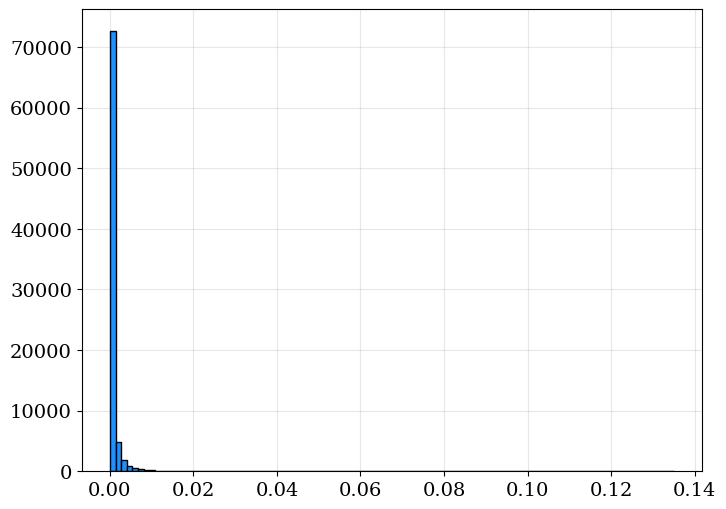

In [335]:
preds = cv.best_estimator_.predict(X)
delta = np.abs(preds - y)
print(np.mean(delta), np.max(delta))
print(len([x for x in delta if x > 0.05]))

plt.hist(delta, bins=100, color="dodgerblue", edgecolor='k')
plt.show()

In [392]:
["wealth", "return", "a", "gamma"]

['wealth', 'return', 'a', 'gamma']

In [380]:
x = (0.1, 20, 0.1, 1.9)

print(f"Actual    : {minimize(utility, x0=0.5, bounds=[(0.05, 0.95)], args=(x)).x[0]:.5f}")
print(f"Predicted : {cv.best_estimator_.predict(np.array(x).reshape(1,4))[0]:.5f}")

Actual    : 0.54892
Predicted : 0.74808


In [391]:
x = (0.1, 20, 0.1, 1.9)

print(f"Actual    : {minimize(utility, x0=0.5, bounds=[(0.05, 0.95)], args=(x)).x[0]:.5f}")
print(f"Predicted : {rfr.predict(np.array(x).reshape(1,4))[0]:.5f}")

Actual    : 0.54892
Predicted : 0.71897


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.1s finished
